In [1]:
class Tile:
    def __init__(self, file, right, down, left, up):
        self.file = file
        self.right = right
        self.down = down
        self.left = left
        self.up = up

    def __repr__(self):
        return self.file

    def matching(self, tileset, direction):
        for tile in tileset:
            if (
                (direction == 'right' and self.right == tile.left) or
                (direction == 'down' and self.down == tile.up) or
                (direction == 'left' and self.left == tile.right) or
                (direction == 'up' and self.up == tile.down)
            ):
                yield tile

dirt


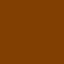

right


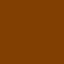

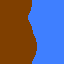

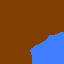

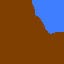

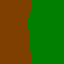

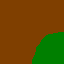

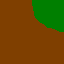

down


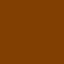

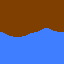

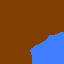

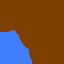

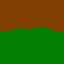

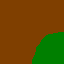

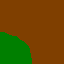

left


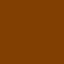

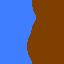

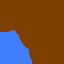

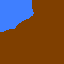

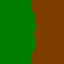

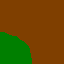

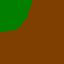

up


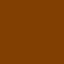

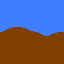

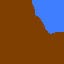

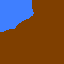

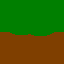

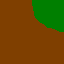

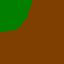



water


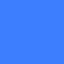

right


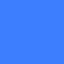

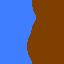

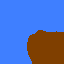

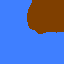

down


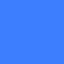

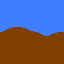

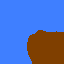

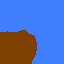

left


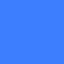

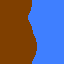

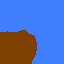

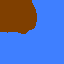

up


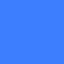

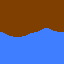

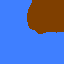

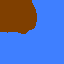



grass


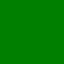

right


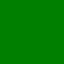

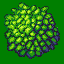

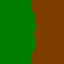

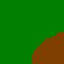

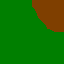

down


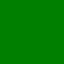

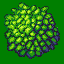

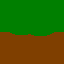

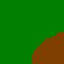

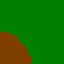

left


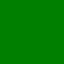

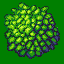

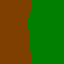

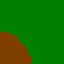

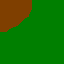

up


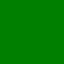

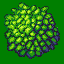

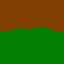

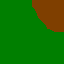

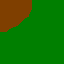



bush


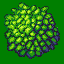

right


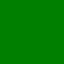

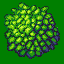

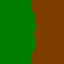

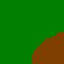

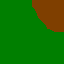

down


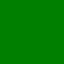

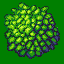

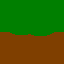

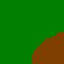

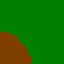

left


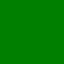

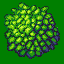

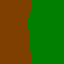

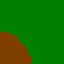

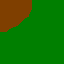

up


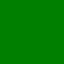

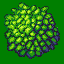

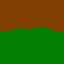

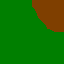

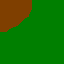



dirt-water


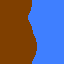

right


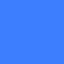

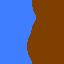

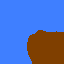

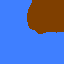

down


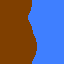

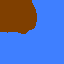

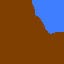

left


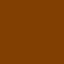

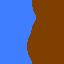

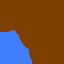

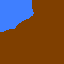

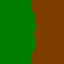

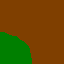

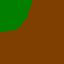

up


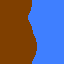

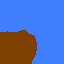

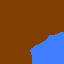



water-dirt


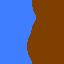

right


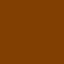

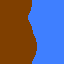

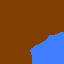

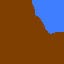

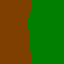

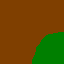

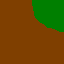

down


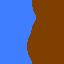

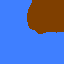

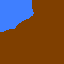

left


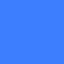

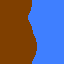

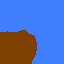

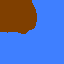

up


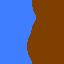

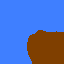

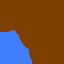



dirt-water-v


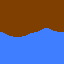

right


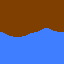

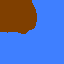

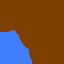

down


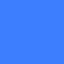

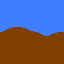

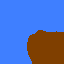

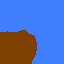

left


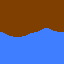

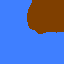

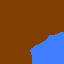

up


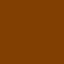

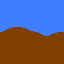

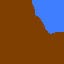

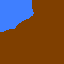

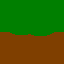

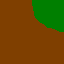

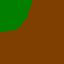



water-dirt-v


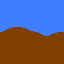

right


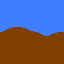

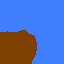

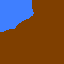

down


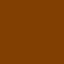

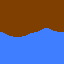

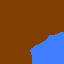

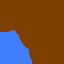

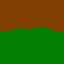

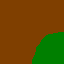

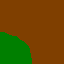

left


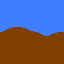

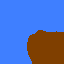

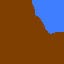

up


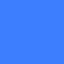

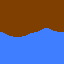

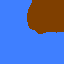

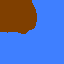



dirt-right-bottom


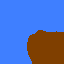

right


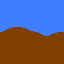

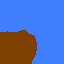

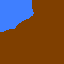

down


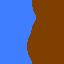

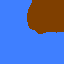

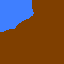

left


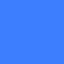

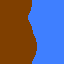

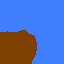

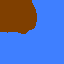

up


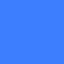

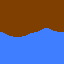

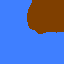

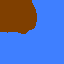



dirt-right-top


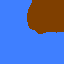

right


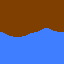

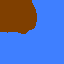

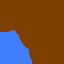

down


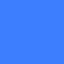

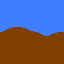

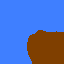

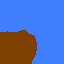

left


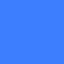

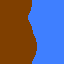

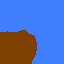

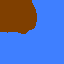

up


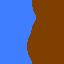

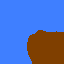

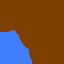



dirt-left-bottom


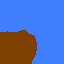

right


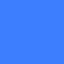

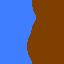

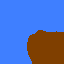

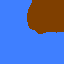

down


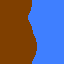

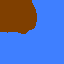

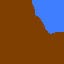

left


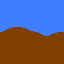

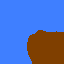

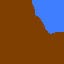

up


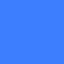

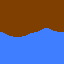

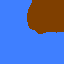

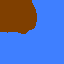



dirt-left-top


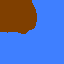

right


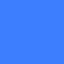

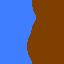

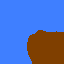

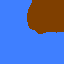

down


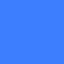

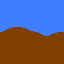

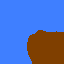

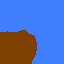

left


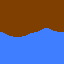

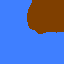

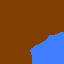

up


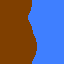

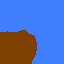

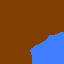



water-right-bottom


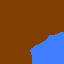

right


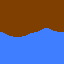

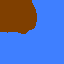

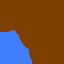

down


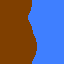

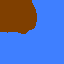

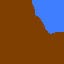

left


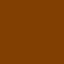

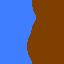

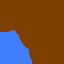

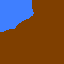

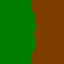

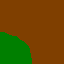

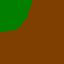

up


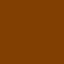

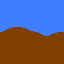

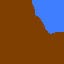

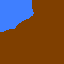

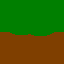

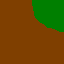

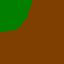



water-right-top


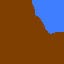

right


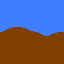

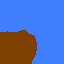

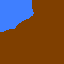

down


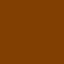

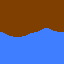

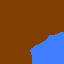

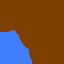

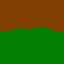

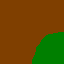

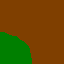

left


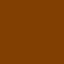

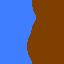

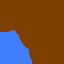

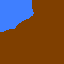

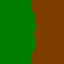

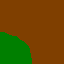

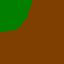

up


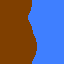

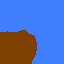

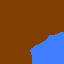



water-left-bottom


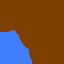

right


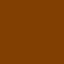

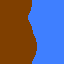

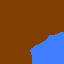

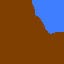

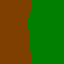

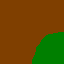

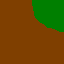

down


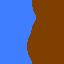

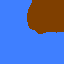

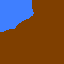

left


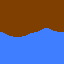

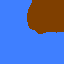

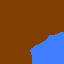

up


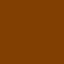

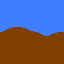

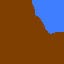

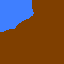

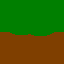

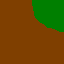

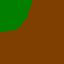



water-left-top


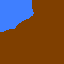

right


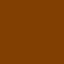

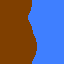

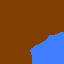

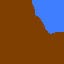

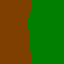

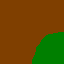

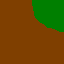

down


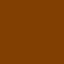

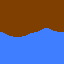

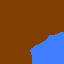

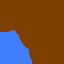

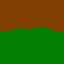

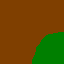

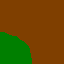

left


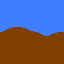

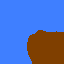

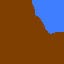

up


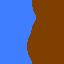

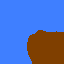

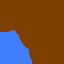



dirt-grass


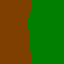

right


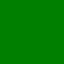

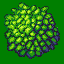

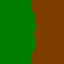

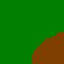

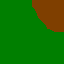

down


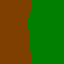

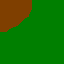

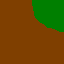

left


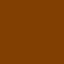

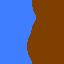

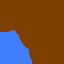

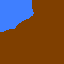

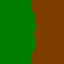

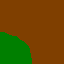

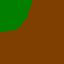

up


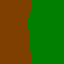

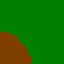

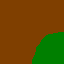



grass-dirt


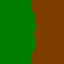

right


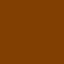

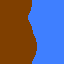

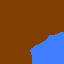

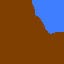

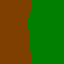

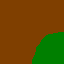

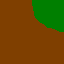

down


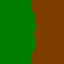

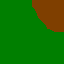

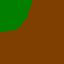

left


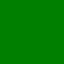

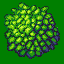

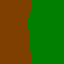

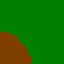

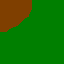

up


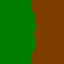

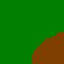

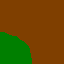



dirt-grass-v


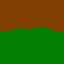

right


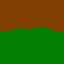

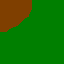

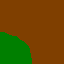

down


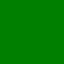

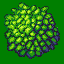

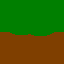

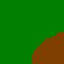

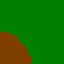

left


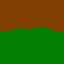

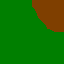

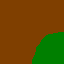

up


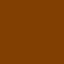

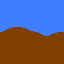

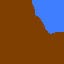

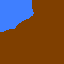

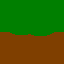

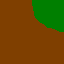

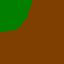



grass-dirt-v


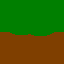

right


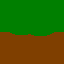

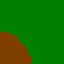

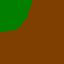

down


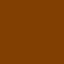

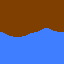

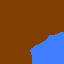

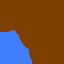

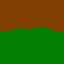

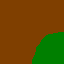

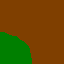

left


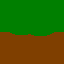

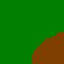

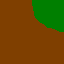

up


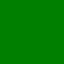

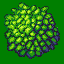

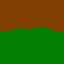

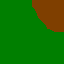

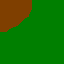



dirt-right-bottom-g


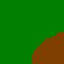

right


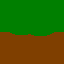

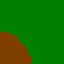

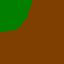

down


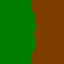

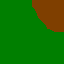

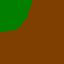

left


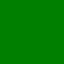

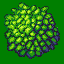

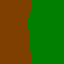

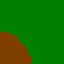

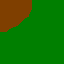

up


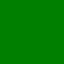

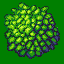

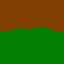

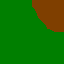

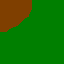



dirt-right-top-g


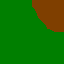

right


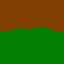

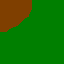

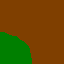

down


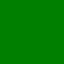

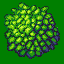

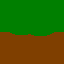

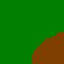

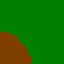

left


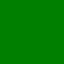

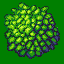

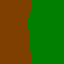

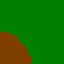

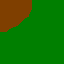

up


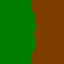

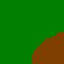

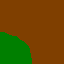



dirt-left-bottom-g


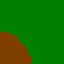

right


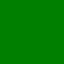

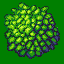

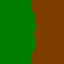

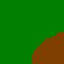

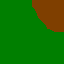

down


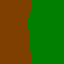

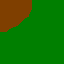

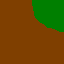

left


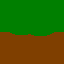

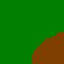

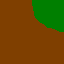

up


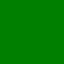

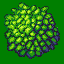

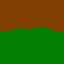

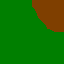

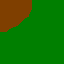



dirt-left-top-g


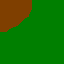

right


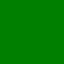

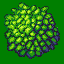

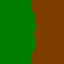

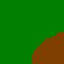

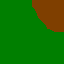

down


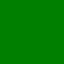

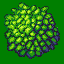

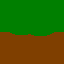

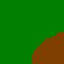

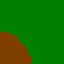

left


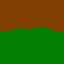

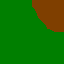

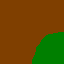

up


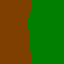

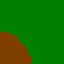

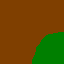



grass-right-bottom


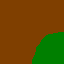

right


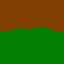

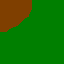

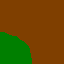

down


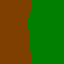

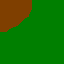

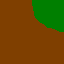

left


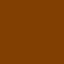

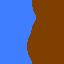

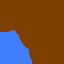

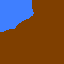

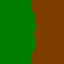

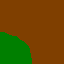

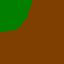

up


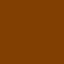

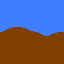

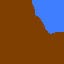

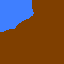

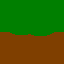

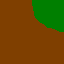

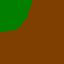



grass-right-top


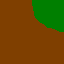

right


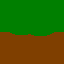

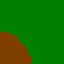

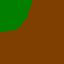

down


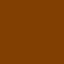

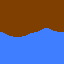

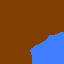

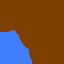

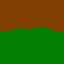

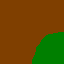

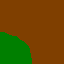

left


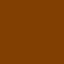

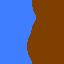

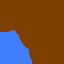

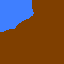

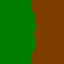

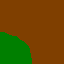

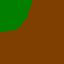

up


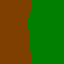

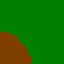

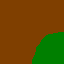



grass-left-bottom


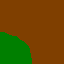

right


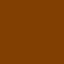

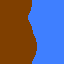

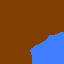

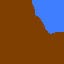

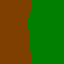

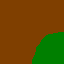

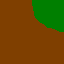

down


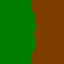

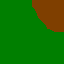

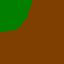

left


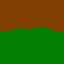

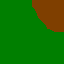

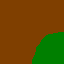

up


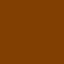

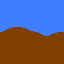

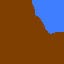

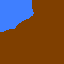

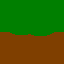

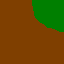

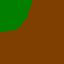



grass-left-top


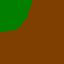

right


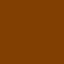

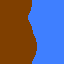

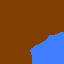

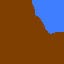

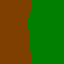

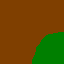

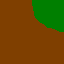

down


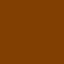

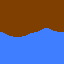

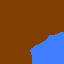

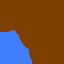

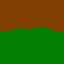

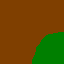

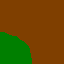

left


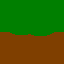

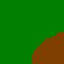

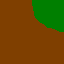

up


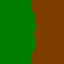

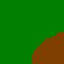

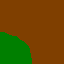

In [2]:
tileset = [
    Tile('dirt', right='dirt', down='dirt', left='dirt', up='dirt'),

    Tile('water', right='water', down='water', left='water', up='water'),
    
    Tile('grass', right='grass', down='grass', left='grass', up='grass'),
    Tile('bush', right='grass', down='grass', left='grass', up='grass'),

    Tile('dirt-water', right='water', down='dirt-water', left='dirt', up='dirt-water'),
    Tile('water-dirt', right='dirt', down='water-dirt', left='water', up='water-dirt'),
    Tile('dirt-water-v', right='dirt-water-v', down='water', left='dirt-water-v', up='dirt'),
    Tile('water-dirt-v', right='water-dirt-v', down='dirt', left='water-dirt-v', up='water'),
    Tile('dirt-right-bottom', right='water-dirt-v', down='water-dirt', left='water', up='water'),
    Tile('dirt-right-top', right='dirt-water-v', down='water', left='water', up='water-dirt'),
    Tile('dirt-left-bottom', right='water', down='dirt-water', left='water-dirt-v', up='water'),
    Tile('dirt-left-top', right='water', down='water', left='dirt-water-v', up='dirt-water'),
    Tile('water-right-bottom', right='dirt-water-v', down='dirt-water', left='dirt', up='dirt'),
    Tile('water-right-top', right='water-dirt-v', down='dirt', left='dirt', up='dirt-water'),
    Tile('water-left-bottom', right='dirt', down='water-dirt', left='dirt-water-v', up='dirt'),
    Tile('water-left-top', right='dirt', down='dirt', left='water-dirt-v', up='water-dirt'),
    
    Tile('dirt-grass', right='grass', down='dirt-grass', left='dirt', up='dirt-grass'),
    Tile('grass-dirt', right='dirt', down='grass-dirt', left='grass', up='grass-dirt'),
    Tile('dirt-grass-v', right='dirt-grass-v', down='grass', left='dirt-grass-v', up='dirt'),
    Tile('grass-dirt-v', right='grass-dirt-v', down='dirt', left='grass-dirt-v', up='grass'),
    Tile('dirt-right-bottom-g', right='grass-dirt-v', down='grass-dirt', left='grass', up='grass'),
    Tile('dirt-right-top-g', right='dirt-grass-v', down='grass', left='grass', up='grass-dirt'),
    Tile('dirt-left-bottom-g', right='grass', down='dirt-grass', left='grass-dirt-v', up='grass'),
    Tile('dirt-left-top-g', right='grass', down='grass', left='dirt-grass-v', up='dirt-grass'),
    Tile('grass-right-bottom', right='dirt-grass-v', down='dirt-grass', left='dirt', up='dirt'),
    Tile('grass-right-top', right='grass-dirt-v', down='dirt', left='dirt', up='dirt-grass'),
    Tile('grass-left-bottom', right='dirt', down='grass-dirt', left='dirt-grass-v', up='dirt'),
    Tile('grass-left-top', right='dirt', down='dirt', left='grass-dirt-v', up='grass-dirt'),
]

from IPython.display import Image
for tile in tileset:
    print(tile)
    display(Image(filename=f'{tile.file}.png'))
    for direction in ['right', 'down', 'left', 'up']:
        print(direction)
        for matching in tile.matching(tileset, direction):
            display(Image(filename=f'{matching.file}.png'))
    print('\n')

In [3]:
size = 10
imagesize = 64
tilemap = [[tileset[:]] * size for _ in range(size)]

from IPython.display import HTML
def drawmap():
    # God is dead, and we have killed him
    display(HTML(
        '<table>{}</table>'.format(
            ''.join(
                '<tr>{}</tr>'.format(
                    ''.join(
                        '<td style="padding: 0px">{}</td>'.format(
                            f'<img width={imagesize}px height={imagesize}px src="{tiles[0]}.png">' if len(tiles) == 1 else
                            '<table style="margin: 5px"><tr>{}</tr><tr>{}</tr><tr>{}</tr><tr>{}</tr></table>'.format(
                                ''.join(
                                    f'<td style="padding: 0px"><img width={2*imagesize//len(tiles)}px height={2*imagesize//len(tiles)}px src={tile}.png></td>' for tile in tiles[:len(tiles)//4]
                                ),
                                ''.join(
                                    f'<td style="padding: 0px"><img width={2*imagesize//len(tiles)}px height={2*imagesize//len(tiles)}px src={tile}.png></td>' for tile in tiles[len(tiles)//4:len(tiles)//2]
                                ),
                                ''.join(
                                    f'<td style="padding: 0px"><img width={2*imagesize//len(tiles)}px height={2*imagesize//len(tiles)}px src={tile}.png></td>' for tile in tiles[len(tiles)//2:3*len(tiles)//4]
                                ),
                                ''.join(
                                    f'<td style="padding: 0px"><img width={2*imagesize//len(tiles)}px height={2*imagesize//len(tiles)}px src={tile}.png></td>' for tile in tiles[3*len(tiles)//4:]
                                ),
                            )
                        ) for tiles in tilerow
                    )
                ) for tilerow in tilemap
            )
        )
    ))

drawmap()

,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,


In [4]:
def collapse(x, y, direction):
    if x < 0 or x >= size or y < 0 or y >= size:
        return

    if direction == 'right':
        triggering_tiles = tilemap[y][x - 1]
    elif direction == 'down':
        triggering_tiles = tilemap[y - 1][x]
    elif direction == 'left':
        triggering_tiles = tilemap[y][x + 1]
    else:
        triggering_tiles = tilemap[y + 1][x]

    new_tiles = [tile for tile in list(set(sum(
        [list(triggering_tile.matching(tileset, direction)) for triggering_tile in triggering_tiles], []
    ))) if tile in tilemap[y][x]]
    if [t.file for t in sorted(new_tiles, key=lambda ti: ti.file)] == [t.file for t in sorted(tilemap[y][x], key=lambda ti: ti.file)]:
        return

    tilemap[y][x] = new_tiles

    if direction == 'right':
        collapse(x + 1, y, 'right')
        collapse(x, y + 1, 'down')
        collapse(x, y - 1, 'up')
    elif direction == 'down':
        collapse(x + 1, y, 'right')
        collapse(x, y + 1, 'down')
        collapse(x - 1, y, 'left')
    elif direction == 'left':
        collapse(x, y + 1, 'down')
        collapse(x - 1, y, 'left')
        collapse(x, y - 1, 'up')
    else:
        collapse(x + 1, y, 'right')
        collapse(x - 1, y, 'left')
        collapse(x, y - 1, 'up')


def set_tile(x, y, value, fancy=True):
    if value not in tilemap[y][x]:
        raise ValueError("tile not in the currently possible set")
    tilemap[y][x] = [value]
    collapse(x + 1, y, 'right')
    collapse(x, y + 1, 'down')
    collapse(x - 1, y, 'left')
    collapse(x, y - 1, 'up')
    if fancy:
        drawmap()

import random

def full_collapse(n=-1):
    while n > 0 or n < 0:
        n -= 1
        collapsible = [(x, y) for x in range(size) for y in range(size) if len(tilemap[y][x]) > 1]
        if not collapsible:
            break
        x, y = random.choice(collapsible)
        tile = random.choice(tilemap[y][x])
        set_tile(x, y, tile, False)
    drawmap()

In [5]:
set_tile(3, 5, tileset[2], False)
set_tile(5, 5, tileset[0])

,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,


In [6]:
full_collapse(5)

In [7]:
full_collapse()

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


In [8]:
print('PLACEHOLDER\n'*40)

PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER
PLACEHOLDER

